<a href="https://colab.research.google.com/github/souvikg544/CodeNCollab/blob/main/KMeansClustering_qrCodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Connect with Google Drive
#Google Drive

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.  
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Load Required Packages & Libraries
import imutils,random, cv2, os, pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
from copy import deepcopy
import pandas as pd
from google.colab.patches import cv2_imshow
# plt.style.use('dark_background')

Consider the following image of a datamatrix and the opposite vertical sides are selected as shown below

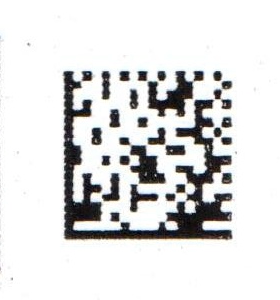

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Programming_Assignment/5.png')
cv2_imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

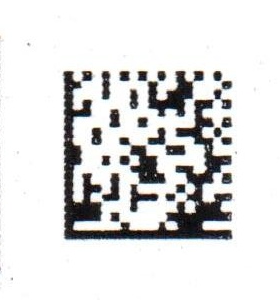

In [ ]:
cv2_imshow(img)

In [ ]:
img.shape

(300, 280, 3)

In [ ]:
_y1 = 70
_y2 = 240
_x1 = 220
_x2 = 233

cv2_imshow(cv2.cvtColor(img[_y1:_y2,_x1:_x2,:], cv2.COLOR_BGR2RGB))

Select 3 columns from the selected vertical edge

In [ ]:
_col1 = deepcopy(img[_y1:_y2,_x1+4:_x1+5,0])
_col2 = deepcopy(img[_y1:_y2,_x1+6:_x1+7,0])
_col3 = deepcopy(img[_y1:_y2,_x1+8:_x1+9,0])

In [ ]:
_col1.shape

(170, 1)

In [ ]:
cv2_imshow(cv2.cvtColor(_col2, cv2.COLOR_BGR2RGB))

Repeat the same for the solid black edge

In [ ]:
y1 = 70
y2 = 240
x1 = 63
x2 = 75

cv2_imshow(cv2.cvtColor(img[y1:y2,x1:x2,:], cv2.COLOR_BGR2RGB))

In [ ]:
col1 = deepcopy(img[y1:y2,x1+4:x1+5,0])
col2 = deepcopy(img[y1:y2,x1+6:x1+7,0])
col3 = deepcopy(img[y1:y2,x1+8:x1+9,0])

In [ ]:
cv2_imshow(col2)

We can create an array from selected columns of pixels from the two edges and shuffle the columns so that we do not know which column belongs to the black solid edge and which to the opposite dashed edge

In [ ]:
col1.shape

(170, 1)

In [ ]:
arr = np.concatenate([col1, _col1, col2, _col2, col3, _col3],axis=1)
arr.shape

(170, 6)

In [ ]:
r = arr[:, np.random.permutation(arr.shape[1])]
df = pd.DataFrame(r)
df.shape

(170, 6)

Write a program which will classify each column of the array if it belongs to the solid edge or dashed edge of the image

In [ ]:
df.head()

,0,1,2,3,4,5
0,247,220,229,247,218,249
1,251,80,110,247,84,248
2,250,35,40,249,24,250
3,251,32,42,247,37,251
4,253,13,39,253,20,252


In [ ]:
df[1]

0      220
1       80
2       35
3       32
4       13
      ... 
165     42
166     59
167     64
168     88
169    162
Name: 1, Length: 170, dtype: uint8

In [ ]:
df1=df.T

In [ ]:
df1

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,247,251,250,251,253,251,247,247,238,245,...,47,12,10,31,33,52,49,45,97,195
1,220,80,35,32,13,24,32,41,35,28,...,41,26,27,32,56,42,59,64,88,162
2,229,110,40,42,39,64,45,54,52,52,...,13,33,29,32,28,38,47,70,77,168
3,247,247,249,247,253,251,250,241,240,239,...,44,17,24,25,32,50,63,63,62,135
4,218,84,24,37,20,35,24,34,27,31,...,44,25,20,32,31,51,42,75,87,167
5,249,248,250,251,252,252,254,251,248,242,...,45,29,30,35,47,58,91,143,153,181


In [ ]:
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df1)

In [ ]:
scaled_df.shape

(6, 170)

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [ ]:
kmeans.fit(scaled_df)

KMeans(init='random', n_clusters=2, random_state=42)

In [ ]:
kmeans.labels_

array([0, 1, 1, 0, 1, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

In [ ]:
df1['result']=kmeans.labels_

In [ ]:
df3=df1.loc[df1['result']==1]

In [ ]:
df2=df1.loc[df1['result']==0]

In [ ]:
df2.drop(columns='result',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df3.drop(columns='result',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


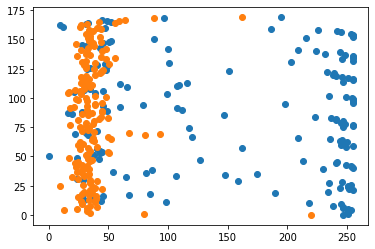

In [ ]:
plt.scatter(df2[:1].values,np.arange(0,170,1))
plt.scatter(df3[:1].values,np.arange(0,170,1))